(1646, 1124)
(164, 112)


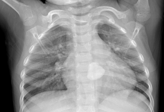

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
import sklearn.datasets
import glob
import sklearn.cluster
from PIL import Image
import random
import sklearn.cluster
import umap

#1. debemos saber el tamaño de las imágenes y que el tamaño de todas sea uniforme
filename=glob.glob('NORMAL/*.jpeg')
filename1=glob.glob('NEUMONIA/*.jpeg') 

im_test=Image.open(filename[0])
print(im_test.size)
dim=im_test.size
#Ahora las nuevas dimensiones serán el 10% de las iniciales para tener un problema comparado con el de las imágenes de famosos
new_size=(int(dim[0]*0.1),int(dim[1]*0.1))
print(new_size)
im_test.resize(new_size)

In [2]:
#Abrimos todos los archivos en la carpeta NORMAL Y NEUMONIA que terminan en jpeg

#print(glob.glob('NEUMONIA/*.jpeg'))
    #NORMAl
img = []
for file in filename: 
    imagen=Image.open(file)
    im_r=imagen.resize(new_size)
    #Convertimos todas las imag en monochro porque hay no todas están en 'L' o 'RGB'
    im_rr=im_r.convert('L')
    a = np.asarray(im_rr)
    img.append(a.flatten())
    
    
    #NEUMONIA
img1 = []
for file1 in filename1:
    imagen1=Image.open(file1)
    im1_r=imagen1.resize(new_size)
    im1_rr=im1_r.convert('L')
    b = np.asarray(im1_rr)
    img1.append(b.flatten())


#Observo de qué tamaño son los archivos y si son uniformes
print(len(img))
print(len(img1))
print(np.shape(img[300]))
print(np.shape(img1[200]))
#Imprimimos una de las imágenes
img[0]

320
1065
(18368,)
(18368,)


array([107, 120, 159, ...,   0,   0,   0], dtype=uint8)

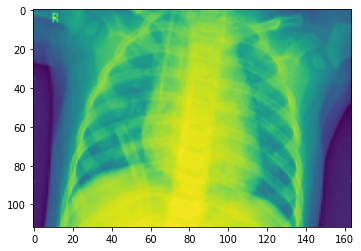

In [4]:
plt.imshow(b)

In [5]:
x = np.ones((len(img), len(img[0])))
for i, im in enumerate(img):
    x[i,:] = im[:]
#Encontramos que de las imágenes había algunas en RGB 
x1 = np.ones((len(img1), len(img1[0])))
for j, im1 in enumerate(img1):
    #if len(im1)==len(img1[0]):
    x1[j,:] = im1[:]

#Vamos a ver cuántas están en RGB    
#c=0
#for k in range(len(x1)):
 #   if x1[k].all()==1:
  #      c+=1
#print(c)        

print(np.shape(x))
print(np.shape(x1))
X=np.append(x,x1,axis=0)
print(np.shape(X))

(320, 18368)
(1065, 18368)
(1385, 18368)


In [6]:
#Ahora vamos a establecer las clases de salida siendo 0:NORMAL , 1: NEUMONIA viral , 2: NEUMONIA bacteriana (las dos clases de neumonia se clasifican en los nombres)
y=np.zeros(len(img))
nombres=glob.glob('NEUMONIA/*.jpeg')
#len(nombres)
y1=np.zeros(len(img1))

for i in range(len(img1)):
    if (str(nombres[i]).find('virus')!=-1):
        y1[i]=1
    else:
        y1[i]=2
#print(np.shape(y1))

yt=np.append(y, y1, axis=0)
print(yt[1010])

print(X[1010])


2.0
[34. 43. 47. ... 39. 39. 40.]


In [7]:
#Como los datos están ordenados, eso puede generar cierto error, los vamos a desorganizar
datosT=np.insert(X, len(X[0]), yt, axis=1)
dimen=len(datosT)
lista= np.arange(dimen)
np.random.shuffle(lista)
datosT_s=datosT[lista]


In [8]:
print(datosT[1010])
print(datosT_s[1010])

[34. 43. 47. ... 39. 40.  2.]
[157. 171. 175. ...   0.   0.   0.]


In [9]:
#Dividimos nuevamente los datos de la salida
X=datosT_s[:,:-1]
#print(X[1010])
Y=datosT_s[:,-1]
#Y[1010]
#AHORA SÍ EL ALGORITMO
reducer = umap.UMAP(n_neighbors=25)
reducer.fit(X)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=25, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [10]:
embedding = reducer.transform(X)

# Recordando que 0: Es SANO , 1: Neumonia VIRAL y 2: Neumonia BACTERIANA 

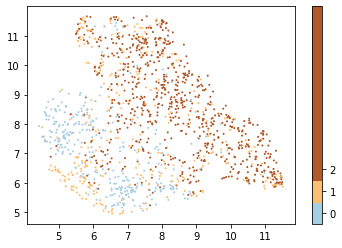

In [11]:
plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(3))

Continuando el código mostrado por el profesor Ejercicio 20

In [12]:
# clusters sobre los resultados de tsne
n_clusters = 3
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster

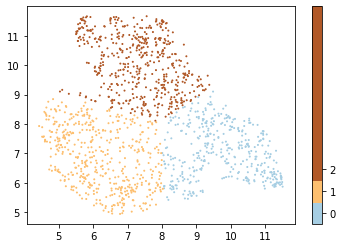

In [13]:
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(3))

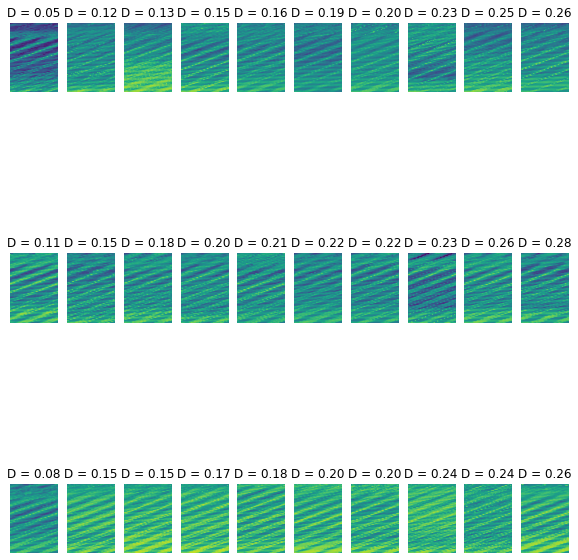

In [14]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(X[ind].reshape(new_size))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

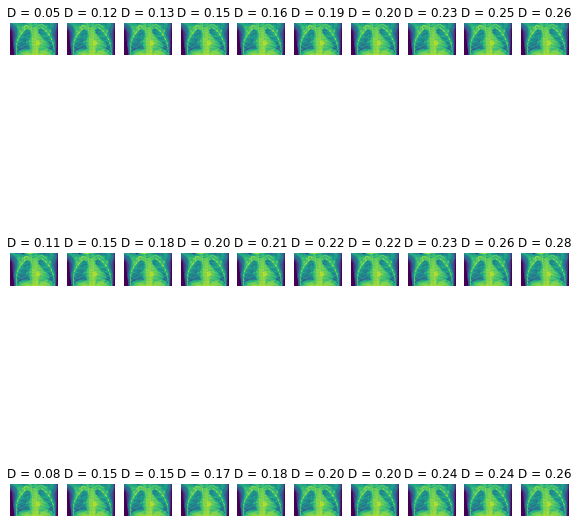

In [22]:
filenames=filename+filename1
def mostrar_imgs(indice):
    im_test1=Image.open(filenames[indice])
    new_size1=(int(new_size[0]*10),int(new_size[1]*10))
    imm=im_test.resize(new_size1)
    f = np.asarray(imm)
    return f

imagenes=img+img1
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        ind1=lista[ind]
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(mostrar_imgs(ind1))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')